<a href="https://colab.research.google.com/github/ctrivino1/Using-ANN-to-predict-bike-rentals/blob/main/Copy_of_starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import altair as alt
import numpy as np
import matplotlib.pyplot as plt


bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

bikes2 = bikes

bikes = bikes.drop(["feels_like_c"],axis=1)

Feature Engineering: 
1. combing casual/registered
2. decide what to do with month column
seperate month, day ,year 
3. hour column from 1-24

In [ ]:
bikes["Total_Rented"] = bikes.casual + bikes.registered

bikes  = bikes.drop(["casual", "registered"], axis=1)

bikes.head()

dteday  season  hr  holiday  ...   hum  windspeed  temp_c  Total_Rented
0  1/1/11       1   0        0  ...  0.81          0    3.28            16
1  1/1/11       1   1        0  ...  0.80          0    2.34            40
2  1/1/11       1   2        0  ...  0.80          0    2.34            32
3  1/1/11       1   3        0  ...  0.75          0    3.28            13
4  1/1/11       1   4        0  ...  0.75          0    3.28             1

[5 rows x 10 columns]

In [ ]:
bikes.hr = bikes.hr.replace(0,24)

In [ ]:
bikes.dteday = pd.to_datetime(bikes.dteday)

bikes.head()

dteday  season  hr  holiday  ...   hum  windspeed  temp_c  Total_Rented
0 2011-01-01       1  24        0  ...  0.81          0    3.28            16
1 2011-01-01       1   1        0  ...  0.80          0    2.34            40
2 2011-01-01       1   2        0  ...  0.80          0    2.34            32
3 2011-01-01       1   3        0  ...  0.75          0    3.28            13
4 2011-01-01       1   4        0  ...  0.75          0    3.28             1

[5 rows x 10 columns]

In [ ]:
bikes["year"] = bikes['dteday'].map(lambda x: x.year)
bikes["day"] = bikes['dteday'].map(lambda x: x.day)
bikes["month"] = bikes['dteday'].map(lambda x: x.month)



bikes.head()

bikes.season.unique()

array([1, 2, 3, 4])

In [ ]:
bikes['sn'] = bikes.season.map({4:"Fall", 2:"Spring", 3:"Summer", 1:"Winter"})
bikes.head()
bikes.sn.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
alt.Chart(bikes).mark_bar().encode(
   alt.X('sn:N', title = "season",sort= ["Winter", "Spring", "Fall", "Summer"]),
   alt.Y('Total_Rented:Q', title = "Total Bikes Rented"),
   color="sn")

alt.Chart(...)

In [ ]:
bikes = bikes.drop(["dteday", "month","sn"], axis=1)
bikes.hr.unique()

array([24,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
bikes["temp_f"] = (bikes.temp_c * 9/5) + 32


bikes = bikes.drop(["temp_c"],axis=1)
bikes.head()

season  hr  holiday  workingday  ...  Total_Rented  year  day  temp_f
0       1  24        0           0  ...            16  2011    1  37.904
1       1   1        0           0  ...            40  2011    1  36.212
2       1   2        0           0  ...            32  2011    1  36.212
3       1   3        0           0  ...            13  2011    1  37.904
4       1   4        0           0  ...             1  2011    1  37.904

[5 rows x 11 columns]

replacing celcisus with farenheight

In [ ]:
"""Used this to explore the orginal data, decided to delete it at the beginning
alt.data_transformers.disable_max_rows()

c1 = alt.Chart(bikes).mark_circle().encode(
    alt.X("feels_like_f"),
    alt.Y("temp_f")
)

c2 = alt.Chart(bikes).mark_circle().encode(
    alt.Y("feels_like_f"),
    alt.X("temp_f")
)

c1 | c2
"""

'Used this to explore the orginal data, decided to delete it at the beginning\nalt.data_transformers.disable_max_rows()\n\nc1 = alt.Chart(bikes).mark_circle().encode(\n    alt.X("feels_like_f"),\n    alt.Y("temp_f")\n)\n\nc2 = alt.Chart(bikes).mark_circle().encode(\n    alt.Y("feels_like_f"),\n    alt.X("temp_f")\n)\n\nc1 | c2\n'

In [ ]:


bikes.head()

array([2011, 2012])

Data correlation:

In [ ]:
corY = pd.DataFrame(bikes.corr().Total_Rented).reset_index()

alt.Chart(corY).mark_bar().encode(
    alt.X("index"),
    alt.Y("Total_Rented")
).properties(width=500)

# try and drop day, holiday, hum, weathersit, working day

alt.Chart(...)

Normalizing:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
bikes1 = bikes
y = bikes1["Total_Rented"]


bikes1.drop(["Total_Rented","holiday","hum","weathersit", "day"],axis=1, inplace = True)


scaler = MinMaxScaler()

scaler.fit(bikes1)

X = pd.DataFrame(scaler.transform(bikes1))



Splitting teh dataset into testing, training

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
ann = tf.keras.models.Sequential()


Adding input layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=13, activation ="relu" ))

Adding the 1st and and 2nd hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=128, activation = "relu"))
ann.add(tf.keras.layers.Dense(units=128, activation="relu"))

Output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

Compiling the ANN

In [ ]:
ann.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"]) # If I don't put anything for metircs it will tell me my loss
# I can put multiple metrics, but not loss functions

Training the data

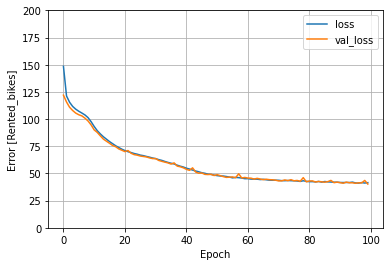

In [ ]:
# I can either look at every printed epoch, or graph it
history = ann.fit(X_train, y_train, batch_size=60, epochs=100, validation_split=.20, verbose = 0)
# stop where the validation loss is at its lowest

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history)



In [ ]:
ann.evaluate(X_test,y_test)
## accuracy does not help me out because I have to be exact
# mean_squared_error punishes outliers

109/109 [==============================] - 0s 1ms/step - loss: 41.4138 - mean_squared_error: 4709.5093 - accuracy: 0.0121 - mean_absolute_error: 41.4138


[41.413841247558594, 4709.50927734375, 0.01208285428583622, 41.413841247558594]

# Data wrangling for the different season

In [ ]:
season = bikes2

season["temp_f"] = (season.temp_c * 9/5) + 32
season = season.drop(["temp_c"],axis=1)

season["Total_Rented"] = season.casual + season.registered
season = season.drop(["casual", "registered"], axis=1)

season.dteday = pd.to_datetime(season.dteday)

season["year"] = season['dteday'].map(lambda x: x.year)
season["day"] = season['dteday'].map(lambda x: x.day)
season["month"] = season['dteday'].map(lambda x: x.month)
season = season.drop(["dteday"], axis=1)


season.head()

season  hr  holiday  workingday  ...  Total_Rented  year  day  month
0       1   0        0           0  ...            16  2011    1      1
1       1   1        0           0  ...            40  2011    1      1
2       1   2        0           0  ...            32  2011    1      1
3       1   3        0           0  ...            13  2011    1      1
4       1   4        0           0  ...             1  2011    1      1

[5 rows x 13 columns]

# Spring

In [ ]:
spring = season[season.season ==2] 

spring.head()


season  hr  holiday  workingday  ...  Total_Rented  year  day  month
1807       2   0        0           1  ...            13  2011   21      3
1808       2   1        0           1  ...             7  2011   21      3
1809       2   2        0           1  ...             6  2011   21      3
1810       2   3        0           1  ...             1  2011   21      3
1811       2   5        0           1  ...             2  2011   21      3

[5 rows x 13 columns]

Correlations

In [ ]:
corY_s = pd.DataFrame(spring.corr().Total_Rented).reset_index()

alt.Chart(corY_s).mark_bar().encode(
    alt.X("index"),
    alt.Y("Total_Rented")
).properties(width=500)

# try and drop day, holiday, hum, weathersit, working day

alt.Chart(...)

Normalizing Spring data

In [ ]:
y_spr = spring["Total_Rented"]


spring.drop(["Total_Rented", "hum", "day", "workingday","weathersit", "season"],axis=1, inplace = True)


scaler = MinMaxScaler()

scaler.fit(spring)

X_spr = pd.DataFrame(scaler.transform(spring))



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Splitting the testing/training data

In [ ]:
X_train_spr, X_test_spr, y_train_spr, y_test_spr = train_test_split(X_spr, y_spr, test_size = 0.2, random_state = 0)

Creating ANN

In [ ]:
ann_spr = tf.keras.models.Sequential()

In [ ]:
ann_spr.add(tf.keras.layers.Dense(units=13, activation ="relu" ))

In [ ]:
ann_spr.add(tf.keras.layers.Dense(units=128, activation = "relu"))
ann_spr.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [ ]:
ann_spr.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann_spr.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"]) # If I don't put anything for metircs it will tell me my loss
# I can put multiple metrics, but not loss functions

Training the data

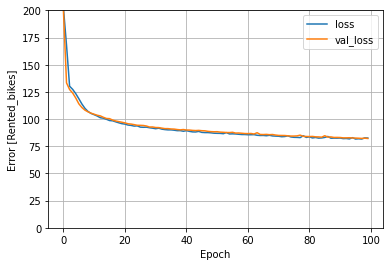

In [ ]:
history_spr = ann_spr.fit(X_train_spr, y_train_spr, batch_size=60, epochs=100, validation_split=.20, verbose = 0)
# stop where the validation loss is at its lowest

def plot_loss(history_spr):
  plt.plot(history_spr.history['loss'], label='loss')
  plt.plot(history_spr.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history_spr)

Evaluating the Model

In [ ]:
ann_spr.evaluate(X_test_spr,y_test_spr)

28/28 [==============================] - 0s 1ms/step - loss: 87.9021 - mean_squared_error: 16560.0957 - accuracy: 0.0045 - mean_absolute_error: 87.9021


[87.90210723876953, 16560.095703125, 0.004535147454589605, 87.90210723876953]

# Summer

In [ ]:
summer = season[season.season ==3] 

summer.head()

season  hr  holiday  workingday  ...  Total_Rented  year  day  month
4010       3   0        0           1  ...            33  2011   21      6
4011       3   1        0           1  ...            14  2011   21      6
4012       3   2        0           1  ...             6  2011   21      6
4013       3   3        0           1  ...             2  2011   21      6
4014       3   4        0           1  ...             9  2011   21      6

[5 rows x 13 columns]

Correlations

In [ ]:
corY_sum = pd.DataFrame(summer.corr().Total_Rented).reset_index()

alt.Chart(corY_sum).mark_bar().encode(
    alt.X("index"),
    alt.Y("Total_Rented")
).properties(width=500)


alt.Chart(...)

Normalizing Summer data

In [ ]:
y_sum = summer["Total_Rented"]


summer.drop(["Total_Rented","hum","weathersit","season"],axis=1, inplace = True)


scaler = MinMaxScaler()

scaler.fit(summer)

X_sum = pd.DataFrame(scaler.transform(summer))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Splitting the data

In [ ]:
X_train_sum, X_test_sum, y_train_sum, y_test_sum = train_test_split(X_sum, y_sum, test_size = 0.2, random_state = 0)

Creating the ANN

In [ ]:
ann_sum = tf.keras.models.Sequential()

ann_sum.add(tf.keras.layers.Dense(units=13, activation ="relu" ))

ann_sum.add(tf.keras.layers.Dense(units=128, activation = "relu"))
ann_sum.add(tf.keras.layers.Dense(units=128, activation="relu"))

ann_sum.add(tf.keras.layers.Dense(units=1))

ann_sum.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"])


Training the ANN

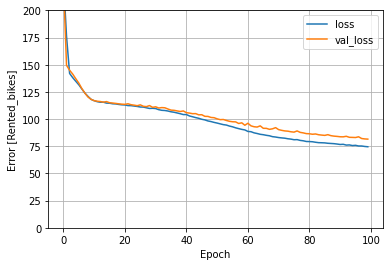

In [ ]:
history_sum = ann_sum.fit(X_train_sum, y_train_sum, batch_size=60, epochs=100, validation_split=.20, verbose = 0)
# stop where the validation loss is at its lowest

def plot_loss(history_sum):
  plt.plot(history_sum.history['loss'], label='loss')
  plt.plot(history_sum.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history_sum)

Evaluating the ANN

In [ ]:
ann_sum.evaluate(X_test_sum,y_test_sum)

29/29 [==============================] - 0s 2ms/step - loss: 79.5234 - mean_squared_error: 16875.9473 - accuracy: 0.0000e+00 - mean_absolute_error: 79.5234


[79.52337646484375, 16875.947265625, 0.0, 79.52337646484375]

# Fall

In [ ]:
fall = season[season.season ==4] 

fall.head()

season  hr  holiday  workingday  ...  Total_Rented  year  day  month
6250       4   0        0           1  ...            52  2011   23      9
6251       4   1        0           1  ...            31  2011   23      9
6252       4   2        0           1  ...            20  2011   23      9
6253       4   3        0           1  ...             8  2011   23      9
6254       4   4        0           1  ...            13  2011   23      9

[5 rows x 13 columns]

Correlations

In [ ]:
corY_f = pd.DataFrame(fall.corr().Total_Rented).reset_index()

alt.Chart(corY_s).mark_bar().encode(
    alt.X("index"),
    alt.Y("Total_Rented")
).properties(width=500)


alt.Chart(...)

Normalizing Fall data

In [ ]:
y_fall = fall["Total_Rented"]


fall.drop(["Total_Rented","day","hum","weathersit","workingday","season"],axis=1, inplace = True)


scaler = MinMaxScaler()

scaler.fit(fall)

X_fall = pd.DataFrame(scaler.transform(fall))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Splitting the data

In [ ]:
X_train_fall, X_test_fall, y_train_fall, y_test_fall = train_test_split(X_fall, y_fall, test_size = 0.2, random_state = 0)

Creating ANN

In [ ]:
ann_fall = tf.keras.models.Sequential()

ann_fall.add(tf.keras.layers.Dense(units=13, activation ="relu" ))

ann_fall.add(tf.keras.layers.Dense(units=128, activation = "relu"))
ann_fall.add(tf.keras.layers.Dense(units=128, activation="relu"))

ann_fall.add(tf.keras.layers.Dense(units=1))

ann_fall.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"])


Training ANN

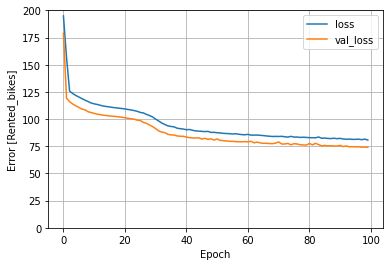

In [ ]:
history_fall = ann_fall.fit(X_train_fall, y_train_fall, batch_size=60, epochs=100, validation_split=.20, verbose = 0)
# stop where the validation loss is at its lowest

def plot_loss(history_fall):
  plt.plot(history_fall.history['loss'], label='loss')
  plt.plot(history_fall.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history_fall)

Evaluating ANN

In [ ]:
ann_fall.evaluate(X_test_fall,y_test_fall)

27/27 [==============================] - 0s 1ms/step - loss: 82.1254 - mean_squared_error: 17135.3711 - accuracy: 0.0059 - mean_absolute_error: 82.1254


[82.12539672851562, 17135.37109375, 0.005903187673538923, 82.12539672851562]

# Winter

In [ ]:
winter = season[season.season ==1] 

winter.head()

season  hr  holiday  workingday  ...  Total_Rented  year  day  month
0       1   0        0           0  ...            16  2011    1      1
1       1   1        0           0  ...            40  2011    1      1
2       1   2        0           0  ...            32  2011    1      1
3       1   3        0           0  ...            13  2011    1      1
4       1   4        0           0  ...             1  2011    1      1

[5 rows x 13 columns]

Correlations

In [ ]:
corY_w = pd.DataFrame(winter.corr().Total_Rented).reset_index()

alt.Chart(corY_s).mark_bar().encode(
    alt.X("index"),
    alt.Y("Total_Rented")
).properties(width=500)


alt.Chart(...)

Normalizing Winter data

In [ ]:
y_win = winter["Total_Rented"]


winter.drop(["Total_Rented","day","hum","weathersit","workingday","season"],axis=1, inplace = True)


scaler = MinMaxScaler()

scaler.fit(winter)

X_win = pd.DataFrame(scaler.transform(winter))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Splitting the Data

In [ ]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(X_win, y_win, test_size = 0.2, random_state = 0)

Creating ANN

In [ ]:
ann_win = tf.keras.models.Sequential()

ann_win.add(tf.keras.layers.Dense(units=13, activation ="relu" ))

ann_win.add(tf.keras.layers.Dense(units=128, activation = "relu"))
ann_win.add(tf.keras.layers.Dense(units=128, activation="relu"))

ann_win.add(tf.keras.layers.Dense(units=1))

ann_win.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"])

Training ANN

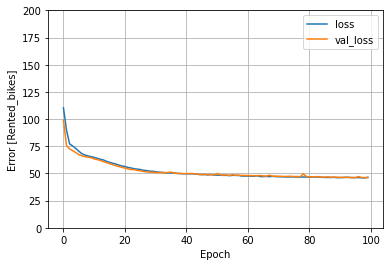

In [ ]:
history_win = ann_win.fit(X_train_win, y_train_win, batch_size=60, epochs=100, validation_split=.20, verbose = 0)
# stop where the validation loss is at its lowest

def plot_loss(history_win):
  plt.plot(history_win.history['loss'], label='loss')
  plt.plot(history_win.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history_win)

Evaluating ANN

In [ ]:
ann_win.evaluate(X_test_win,y_test_win)

27/27 [==============================] - 0s 1ms/step - loss: 45.5557 - mean_squared_error: 6066.1851 - accuracy: 0.0318 - mean_absolute_error: 45.5557


[45.55565643310547, 6066.18505859375, 0.03180212154984474, 45.55565643310547]